In [12]:
import os
import gzip
import json
import plac
import random
import numpy as np
import pandas as pd
import networkx as nx
from scipy import stats as ss
from google.colab import drive
import matplotlib.pyplot as plt
from IPython.display import clear_output
from statsmodels.distributions.empirical_distribution import ECDF
drive.mount('/gdrive', force_remount=True)
os.chdir('/gdrive/My Drive/IC_tales/code')
import disrupt as dr
import amutils as at

Mounted at /gdrive


<br><p>Carregando os dados</p><br>

Mounted at /gdrive


In [0]:
with open('../data/whosampled_year_data.json') as who_sampled_file:
    who_sampled_json = json.load(who_sampled_file)

<br><h4>Construindo o grafo</h4><br>

In [0]:
G = at.build_graph_who_sampled(who_sampled_json)

In [0]:
print("Vértices: ", G.number_of_nodes(),"\nArestas: ",G.number_of_edges())

Vértices:  165377 
Arestas:  560498


<br><h4>Carregando a tabela de disruptividade do Whosampled.</h4><br>
<p>Essa tabela foi previamente calculada</p><br>

In [11]:
#G_table_whosampled = dr.compute_disruption(G)
G_table_whosampled = pd.read_csv('../data/G_table_whosampled_disruption.csv')
G_table_whosampled = G_table_whosampled.rename(columns = {'Unnamed: 0':''})
G_table_whosampled.index = G_table_whosampled['']
G_table_whosampled = G_table_whosampled.drop(columns = '')
G_table_whosampled = G_table_whosampled.dropna().copy()
G_table_whosampled.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
1950s Housewife Tries LSD,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.1994
David Dundas,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0137
RIFF (Argentinian Band),4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.2032
Carmen Silva,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.2605
David Peña Dorantes,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.4156


<br><h4>Calculo do PageRank</h4><br>
<p>Correlação entre o PageRank e a disruptividade</p><br>

In [0]:
G_table_whosampled['pagerank'] = pd.DataFrame(nx.pagerank(G).values(), index = nx.pagerank(G).keys())


In [0]:
spearman = tuple(ss.spearmanr(G_table_whosampled['disruption'],G_table_whosampled['pagerank']))
pearson = tuple(ss.pearsonr(G_table_whosampled['disruption'],G_table_whosampled['pagerank']))
print('Spearman: ',spearman[0], 'pvalue:', spearman[1])
print('Pearson: ',pearson[0], 'pvalue:', pearson[1])

Spearman:  -0.46048575501537775 pvalue: 0.0
Pearson:  -0.07263084309319272 pvalue: 3.0373682474097442e-62


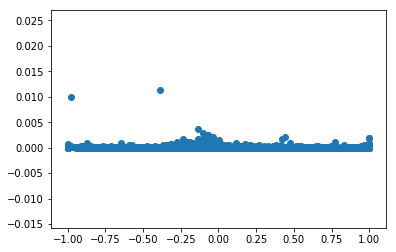

In [0]:
plt.scatter(G_table_whosampled['disruption'],G_table_whosampled['pagerank'])
plt.show()

<br><h4>Calculo do Betweeness Centrality</h4><br>
<p>Correlação entre o Betweeness Centrality e a disruptividade</p><br>

In [0]:
bet_cen = nx.betweenness_centrality(G)
G_table_whosampled['bet_cen'] = pd.DataFrame(bet_cen.values(), index = bet_cen.keys())   